# Prokhorov Ivan

In [38]:
import pandas as pd
import numpy as np
from IPython.core.pylabtools import figsize
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [8]:
data = pd.read_csv('train_v2.csv')

C:\Program Files (x86)\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (135,204,274,417) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,...,5,2.14,-1.54,1.18,0.1833,0.7873,1,0,5,0
1,2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,...,6,0.54,-0.24,0.13,0.1926,-0.6787,1,0,5,0
2,3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,...,13,2.89,-1.73,1.04,0.2521,0.7258,1,0,5,0
3,4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,...,4,1.29,-0.89,0.66,0.2498,0.7119,1,0,5,0
4,5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,...,26,6.11,-3.82,2.51,0.2282,-0.5399,0,0,5,0


In [4]:
data.shape

(105471, 771)

In [5]:
data.describe()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
count,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105289.000000,105370.000000,105471.000000,...,105471.000000,105471.000000,105471.000000,105471.000000,104407.000000,103946.000000,105471.000000,105471.000000,105471.000000,105471.000000
mean,52736.000000,134.603171,8.246883,0.499066,2678.488874,7.354533,47993.704317,2974.336018,2436.363718,134.555225,...,17.422543,5.800976,-4.246788,3.273059,0.233852,0.014797,0.310246,0.322847,175.951589,0.799585
std,30446.999458,14.725467,1.691535,0.288752,1401.010943,5.151112,35677.136048,2546.551085,2262.950221,13.824682,...,18.548936,6.508555,4.828265,3.766746,0.073578,1.039439,0.462597,0.467567,298.294043,4.321120
min,1.000000,103.000000,1.000000,0.000006,1100.000000,1.000000,0.000000,1.000000,1.000000,106.820000,...,2.000000,0.000000,-43.160000,0.000000,0.000000,-18.439600,0.000000,0.000000,2.000000,0.000000
25%,26368.500000,124.000000,8.000000,0.248950,1500.000000,4.000000,11255.000000,629.000000,746.000000,124.290000,...,5.000000,1.480000,-5.700000,0.740000,0.198400,-0.704275,0.000000,0.000000,19.000000,0.000000
50%,52736.000000,129.000000,9.000000,0.498267,2200.000000,4.000000,76530.000000,2292.000000,1786.000000,128.460000,...,11.000000,3.570000,-2.600000,1.990000,0.251800,0.375400,0.000000,0.000000,40.000000,0.000000
75%,79103.500000,148.000000,9.000000,0.749494,3700.000000,10.000000,80135.000000,4679.000000,3411.000000,149.080000,...,23.000000,7.700000,-1.010000,4.440000,0.283600,0.737100,1.000000,1.000000,104.000000,0.000000
max,105471.000000,176.000000,11.000000,0.999994,7900.000000,17.000000,88565.000000,9968.000000,11541.000000,172.950000,...,168.000000,58.120000,0.000000,34.040000,0.473700,11.092000,1.000000,1.000000,1212.000000,100.000000


In [9]:
data.fillna(data.mean(), inplace=True)

C:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [10]:
data.dropna(inplace=True)


In [11]:
data.shape

(103302, 771)

In [15]:
for i in data.select_dtypes(include=['object']).columns:
    data.drop(labels=i, axis=1, inplace=True)

Text(0.5, 1.0, 'Loss Distribution')

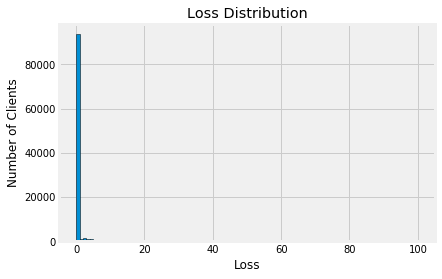

In [46]:


figsize=(8, 8)

# Histogram of the loss

plt.hist(data['loss'], bins = 100, edgecolor = 'k')
plt.xlabel('Loss') 
plt.ylabel('Number of Clients');
plt.title('Loss Distribution')

In [19]:



correlations_data = data.corr()['loss'].sort_values()


print(correlations_data.head(15), '\n')


print(correlations_data.tail(15))

f612   -0.016943
f776   -0.015111
f315   -0.011106
f70    -0.010740
f314   -0.010689
f323   -0.010676
f69    -0.010269
f322   -0.009299
f734   -0.009284
f738   -0.008635
f1     -0.008162
f631   -0.008097
f428   -0.007973
f666   -0.007868
f299   -0.007778
Name: loss, dtype: float64 

f674    0.018999
f536    0.026087
f471    0.039538
loss    1.000000
f33          NaN
f34          NaN
f35          NaN
f37          NaN
f38          NaN
f678         NaN
f700         NaN
f701         NaN
f702         NaN
f736         NaN
f764         NaN
Name: loss, dtype: float64


In [23]:
for i in data.columns:
    if len(set(data[i]))==1:
        data.drop(labels=[i], axis=1, inplace=True)

In [24]:
# Find all correlations and sort 
correlations_data = data.corr()['loss'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

f612   -0.016943
f776   -0.015111
f315   -0.011106
f70    -0.010740
f314   -0.010689
f323   -0.010676
f69    -0.010269
f322   -0.009299
f734   -0.009284
f738   -0.008635
f1     -0.008162
f631   -0.008097
f428   -0.007973
f666   -0.007868
f299   -0.007778
Name: loss, dtype: float64 

f282    0.010726
f251    0.010915
f221    0.010968
f556    0.011575
f675    0.011606
f13     0.011933
f68     0.013375
f599    0.014165
f597    0.014165
f670    0.014811
f67     0.015012
f674    0.018999
f536    0.026087
f471    0.039538
loss    1.000000
Name: loss, dtype: float64


In [61]:
data.shape

(103302, 156)

In [28]:
# # # Feature Engineering and Selection

def remove_col_cols(x, threshold):

    y = x['loss']
    x = x.drop(columns = ['loss'])
    

    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
           
            if val >= threshold:

                drop_cols.append(col.values[0])

    
    drops = set(drop_cols)
    x = x.drop(columns = drops)
  
    x['loss'] = y
               
    return x

In [47]:
data = remove_col_cols(data, 0.8);

In [48]:
features = data.drop(columns=['loss','id'])
id_train = data['id']
targets = pd.DataFrame(data['loss'])

In [49]:
df = pd.read_csv('test_v2.csv')

C:\Program Files (x86)\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (417) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [50]:
df.fillna(df.mean(), inplace=True)

C:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [52]:
intersection_cols = df.columns & data.columns
res = df[intersection_cols]


C:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  """Entry point for launching an IPython kernel.


In [53]:
test_id = df['id']
res = res.drop(columns='id')

In [54]:
sc = StandardScaler()
res = sc.fit_transform(res)
# X_test = sc.transform(X_test)
train = sc.fit_transform(features)
train_target = np.array(targets).reshape((-1, ))

In [55]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random.fit(features, targets)
random_pred = random.predict(res)

C:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [56]:
from xgboost import XGBClassifier
gb = XGBClassifier()
gb.fit(train, train_target)
gb_predict = gb.predict(res)

C:\Users\Иван\AppData\Roaming\Python\Python37\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:02:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [57]:
submission_random = pd.DataFrame({'id': test_id, 'loss': random_pred})

In [58]:
submission_gb = pd.DataFrame({'id': test_id, 'loss': gb_predict})

In [59]:
submission_random.to_csv('sumbission_random_2.csv', index=False)

In [60]:
submission_gb.to_csv('sumbission_gb_2.csv', index=False)